Cite:
D. A. Goldstein, et al. 2015 "Automated Transient Identification in the Dark Energy Survey" AJ (accepted).

# Background

* Machine Learning is ...
* We are aiming here to...
* There are two types ...

In [3]:
from skimage.io import imread, imshow

from matplotlib import pyplot as plt

path_to_sample_image = '/project/projectdirs/dasrepo/data_day/home2/SNWG/Archive/2013/Y1/20130901/471664938/temp7695033.gif'

%matplotlib inline

#### Here is a sample astronomy image:

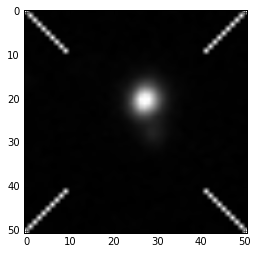

In [4]:
im = imread(path_to_sample_image)

#get an image of the other day

plt.imshow(im,cmap='gray')

Instead of running directly on the images, we will run on 40 physics computed features. If we compute pretty discriminating features, this will make it easier for the ML algo to discriminate

It would interesting to see if a machine learning algorithm could discriminate solely based on the pixels of the image. If you are interested, I can show later applying deep learning to do classification on the raw images

We have a csv file. Here is what it looks like. Each line represents a single event. Each event consists of 40 numbers which are these physically motivated features from the image. The first row of the file is the header with the name of each feature


In [5]:
! head -2 './autoscan_features.2.csv' 

ID,OBJECT_TYPE,AMP,A_IMAGE,A_REF,BAND,B_IMAGE,B_REF,CCDID,COLMEDS,DIFFSUMRN,ELLIPTICITY,FLAGS,FLUX_RATIO,GAUSS,GFLUX,L1,LACOSMIC,MAG,MAGDIFF,MAGLIM,MAG_FROM_LIMIT,MAG_REF,MAG_REF_ERR,MASKFRAC,MIN_DISTANCE_TO_EDGE_IN_NEW,N2SIG3,N2SIG3SHIFT,N2SIG5,N2SIG5SHIFT,N3SIG3,N3SIG3SHIFT,N3SIG5,N3SIG5SHIFT,NN_DIST_RENORM,NUMNEGRN,SCALE,SNR,SPREADERR_MODEL,SPREAD_MODEL
10742010,0,0.8083234429359436,1.5080000162124634,2.65006947517395,i,0.949999988079071,1.8995014429092407,10,0.11207699775695801,25.857545852661133,0.37002652883529663,0,0.2590300440788269,226.4202880859375,1.0089635848999023,103.80699920654297,1.736109972000122,23.031299591064453,-0.4524995982646942,0,1.6222000122070312,22.578800201416016,0.11959999799728394,0.0,559.7000122070312,0,-7,0,-8,0,-8,0,-9,0.6749339699745178,22,2.0241222381591797,7.722346305847168,0.004628799855709076,-0.0037175000179558992


Ok, we will use spark, here, so let's load the modules of interest

In [6]:
from pyspark.sql import SparkSession

SparkSession is...

In [7]:
spark = SparkSession.builder.getOrCreate()

In [8]:
df = spark.read.csv('./autoscan_features.2.csv', header=True)

In [30]:
df=df.drop('ID')
df=df.drop('BAND')

In [31]:
df.printSchema()

#describe a couple of the physics features

root
 |-- OBJECT_TYPE: string (nullable = true)
 |-- AMP: string (nullable = true)
 |-- A_IMAGE: string (nullable = true)
 |-- A_REF: string (nullable = true)
 |-- B_IMAGE: string (nullable = true)
 |-- B_REF: string (nullable = true)
 |-- CCDID: string (nullable = true)
 |-- COLMEDS: string (nullable = true)
 |-- DIFFSUMRN: string (nullable = true)
 |-- ELLIPTICITY: string (nullable = true)
 |-- FLAGS: string (nullable = true)
 |-- FLUX_RATIO: string (nullable = true)
 |-- GAUSS: string (nullable = true)
 |-- GFLUX: string (nullable = true)
 |-- L1: string (nullable = true)
 |-- LACOSMIC: string (nullable = true)
 |-- MAG: string (nullable = true)
 |-- MAGDIFF: string (nullable = true)
 |-- MAGLIM: string (nullable = true)
 |-- MAG_FROM_LIMIT: string (nullable = true)
 |-- MAG_REF: string (nullable = true)
 |-- MAG_REF_ERR: string (nullable = true)
 |-- MASKFRAC: string (nullable = true)
 |-- MIN_DISTANCE_TO_EDGE_IN_NEW: string (nullable = true)
 |-- N2SIG3: string (nullable = true)
 

In [32]:
df.groupBy('OBJECT_TYPE').count().show()

+-----------+------+
|OBJECT_TYPE| count|
+-----------+------+
|          0|454092|
|          1|444871|
+-----------+------+



In [69]:
arow= df.take(1)[0]

In [70]:
arow

Row(OBJECT_TYPE=u'0', AMP=u'0.8083234429359436', A_IMAGE=u'1.5080000162124634', A_REF=u'2.65006947517395', B_IMAGE=u'0.949999988079071', B_REF=u'1.8995014429092407', CCDID=u'10', COLMEDS=u'0.11207699775695801', DIFFSUMRN=u'25.857545852661133', ELLIPTICITY=u'0.37002652883529663', FLAGS=u'0', FLUX_RATIO=u'0.2590300440788269', GAUSS=u'226.4202880859375', GFLUX=u'1.0089635848999023', L1=u'103.80699920654297', LACOSMIC=u'1.736109972000122', MAG=u'23.031299591064453', MAGDIFF=u'-0.4524995982646942', MAGLIM=u'0', MAG_FROM_LIMIT=u'1.6222000122070312', MAG_REF=u'22.578800201416016', MAG_REF_ERR=u'0.11959999799728394', MASKFRAC=u'0.0', MIN_DISTANCE_TO_EDGE_IN_NEW=u'559.7000122070312', N2SIG3=u'0', N2SIG3SHIFT=u'-7', N2SIG5=u'0', N2SIG5SHIFT=u'-8', N3SIG3=u'0', N3SIG3SHIFT=u'-8', N3SIG5=u'0', N3SIG5SHIFT=u'-9', NN_DIST_RENORM=u'0.6749339699745178', NUMNEGRN=u'22', SCALE=u'2.0241222381591797', SNR=u'7.722346305847168', SPREADERR_MODEL=u'0.004628799855709076', SPREAD_MODEL=u'-0.0037175000179558992'

In [14]:
from pyspark.mllib.linalg import Vectors

In [19]:
from pyspark.sql import Row

In [188]:
# df.subtract?

# means=df.agg(dict(zip(df.columns, len(df.columns)*['mean'])))

In [51]:
roww =df.rdd.map(lambda row:
                 (int(row['OBJECT_TYPE']), )))

In [58]:
a=roww.take(1)[0][1]

In [64]:
a['AMP']

u'0.8083234429359436'

In [53]:
d= roww.map(lambda (label, row): (label, Vectors.dense(row[:])))

In [56]:
d.take(1)

[(0,
  DenseVector([0.8083, 1.508, 2.6501, 0.95, 1.8995, 10.0, 0.1121, 25.8575, 0.37, 0.0, 0.259, 226.4203, 1.009, 103.807, 1.7361, 23.0313, -0.4525, 0.0, 1.6222, 22.5788, 0.1196, 0.0, 559.7, 0.0, -7.0, 0.0, -8.0, 0.0, -8.0, 0.0, -9.0, 0.6749, 22.0, 2.0241, 7.7223, 0.0046, -0.0037]))]

In [55]:
d.take(2)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 30.0 failed 1 times, most recent failure: Lost task 0.0 in stage 30.0 (TID 431, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/global/common/cori/software/spark/2.0.0/python/pyspark/rdd.py", line 1306, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-53-f08d358a6620>", line 1, in <lambda>
ValueError: could not convert string to float: 

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:809)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1144)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1884)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1897)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:56)
	at java.lang.reflect.Method.invoke(Method.java:620)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:809)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/global/common/cori/software/spark/2.0.0/python/pyspark/rdd.py", line 1306, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-53-f08d358a6620>", line 1, in <lambda>
ValueError: could not convert string to float: 

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD$$anonfun$6.apply(PythonRDD.scala:441)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	... 1 more


In [45]:
from pyspark.sql.types import StructField, IntegerType, StructType, Ve

In [49]:
training_data=spark.createDataFrame(d.collect(),['label', 'feature'])

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 26.0 failed 1 times, most recent failure: Lost task 0.0 in stage 26.0 (TID 426, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-36-f08d358a6620>", line 1, in <lambda>
ValueError: could not convert string to float: 

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:893)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:893)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:809)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1144)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1884)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1897)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1911)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:893)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:358)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:892)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:56)
	at java.lang.reflect.Method.invoke(Method.java:620)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:809)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-36-f08d358a6620>", line 1, in <lambda>
ValueError: could not convert string to float: 

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:893)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:893)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:1897)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	... 1 more


In [47]:
features.schema

StructType(List(StructField(_1,LongType,true),StructField(_2,VectorUDT,true)))

In [48]:
training_data.take(1)

Py4JJavaError: An error occurred while calling z:org.apache.spark.sql.execution.python.EvaluatePython.takeAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 25.0 failed 1 times, most recent failure: Lost task 0.0 in stage 25.0 (TID 425, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-36-f08d358a6620>", line 1, in <lambda>
ValueError: could not convert string to float: 

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$$anon$12.nextCur(Iterator.scala:434)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$4.apply(SparkPlan.scala:246)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$4.apply(SparkPlan.scala:240)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:784)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:784)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	at java.lang.Thread.run(Thread.java:809)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1144)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1884)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1897)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:347)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply$mcI$sp(EvaluatePython.scala:41)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2532)
	at org.apache.spark.sql.execution.python.EvaluatePython$.takeAndServe(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.python.EvaluatePython.takeAndServe(EvaluatePython.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:56)
	at java.lang.reflect.Method.invoke(Method.java:620)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Thread.java:809)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/global/common/cori/software/spark/2.0.0/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-36-f08d358a6620>", line 1, in <lambda>
ValueError: could not convert string to float: 

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:156)
	at org.apache.spark.api.python.PythonRunner$$anon$1.next(PythonRDD.scala:152)
	at org.apache.spark.InterruptibleIterator.next(InterruptibleIterator.scala:43)
	at scala.collection.Iterator$$anon$12.nextCur(Iterator.scala:434)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$4.apply(SparkPlan.scala:246)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$4.apply(SparkPlan.scala:240)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:784)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:784)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:627)
	... 1 more
